In [71]:
from pandas import *
import matplotlib.pyplot as plt
import pandas as pd
from typing import *

nameStr: str = """  1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car_name:      string (unique for each instance)
"""

_names: List[str] = [line.split()[1][:-1] for line in nameStr.splitlines()]

raw: DataFrame = read_csv("d:\\data\\uci\\auto-mpg.data", header=None, names=_names, delimiter="\t")
#raw


In [102]:
mpg: DataFrame = raw[["mpg"]]
mpg.describe(percentiles=[.45, .80])

GOOD: float = 31
BAD: float = 21

def rate(v: float)-> float:
    if v < BAD:
        return -1
    if v >= GOOD:
        return 1
    return 0


rated: DataFrame = DataFrame(raw)
rated["rate"] = mpg.applymap(rate)



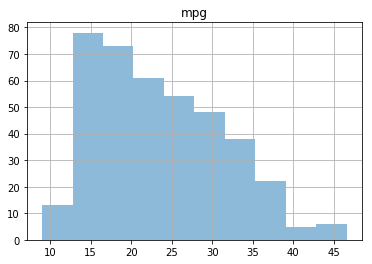

In [103]:
mpg.hist(alpha=0.5)
plt.show()

In [108]:
import numpy as np
import scipy as sp
from sklearn import tree
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.cross_validation import train_test_split

rated
# split: List[DataFrame] = train_test_split(raw, mpg, test_size=0.2)
# train: DataFrame = split[0]
# test: DataFrame = split[1]
# train
# test

,mpg,cylinders,displacement,horsepower,weight,acceleration,mode,origin,car_name,rate
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,-1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,-1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,-1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,-1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,-1
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,-1
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,-1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,-1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,-1
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl,-1


In [97]:
entropyTree: tree.DecisionTreeClassifier = tree.DecisionTreeClassifier(criterion="entropy")
print(entropyTree)
entropyTree.fit(train, test)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
